# Imports and Dataset

In [ ]:
import numpy as np
import pandas as pd

from keras.layers import Dense, Dropout, Input, ReLU
from keras.models import Model, Sequential
from keras.optimizers import Adam
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
import matplotlib.image as mpimg
import glob

from PIL import Image
import matplotlib.pyplot as plt
import os
from keras import preprocessing
from keras.models import Sequential
from keras.layers import Conv2D,Dropout,Dense,Flatten,Conv2DTranspose,BatchNormalization,LeakyReLU,Reshape
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

Using TensorFlow backend.


/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_810.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_511.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_581.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_540.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1683.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1765.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1012.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_2613.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_79.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1232.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1812.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1085.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_993.jpg
/kaggle/input/abstr

/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1213.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_2231.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1947.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1718.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_548.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1309.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1236.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1245.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_1089.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_424.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_106.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_986.jpg
/kaggle/input/abstract-art-gallery/Abstract_gallery/Abstract_image_2074.jpg
/kaggle/input/ab

# Preparing Data

In [ ]:
path_arts = []
train_path_arts = "/kaggle/input/abstract-art-gallery/Abstract_gallery/"
for path in os.listdir(train_path_arts):
    if '.jpg' in path:
        path_arts.append(os.path.join(train_path_arts, path))


In [ ]:
new_path=path_arts

In [ ]:
images = [np.array((Image.open(path)).resize((128,128))) for path in new_path]

for i in range(len(images)):
    images[i] = ((images[i] - images[i].min())/(255 - images[i].min()))
    #images[i] = images[i]*2-1

images = np.array(images)

In [ ]:
train_data=images

In [ ]:
len(train_data)

2782

<Figure size 720x720 with 0 Axes>

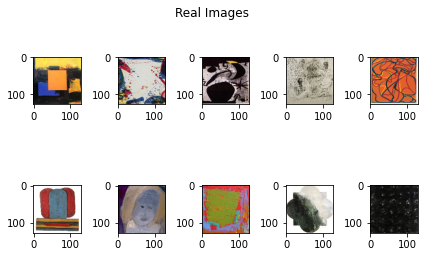

In [ ]:
plt.figure(figsize=(10,10))
fig,ax=plt.subplots(2,5)
fig.suptitle("Real Images")
idx=0

for i in range(2):
    for j in range(5):
            ax[i,j].imshow(train_data[idx].reshape(128,128,3))
            #ax[i,j].set_title("Real Image")

            idx+=200

plt.tight_layout()
plt.show()

In [ ]:
X_train = train_data

In [ ]:
noise_shape = 100

In [ ]:
generator=Sequential()
generator.add(Dense(4*4*512,input_shape=[noise_shape]))
generator.add(Reshape([4,4,512]))
generator.add(Conv2DTranspose(2048, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(1024, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(512, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(256, kernel_size=4, strides=2, padding="same"))
generator.add(LeakyReLU(alpha=0.2))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3, kernel_size=4, strides=2, padding="same",
                                 activation='sigmoid'))

In [ ]:
generator.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 8192)              827392    
_________________________________________________________________
reshape (Reshape)            (None, 4, 4, 512)         0         
_________________________________________________________________
conv2d_transpose (Conv2DTran (None, 8, 8, 2048)        16779264  
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 8, 8, 2048)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 8, 8, 2048)        8192      
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 16, 16, 1024)      33555456  
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 16, 16, 1024)      0

In [ ]:
discriminator=Sequential()
discriminator.add(Conv2D(32, kernel_size=4, strides=2, padding="same",input_shape=[128,128, 3]))
discriminator.add(Conv2D(64, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(128, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(BatchNormalization())
discriminator.add(Conv2D(256, kernel_size=4, strides=2, padding="same"))
discriminator.add(LeakyReLU(0.2))
discriminator.add(Flatten())
discriminator.add(Dropout(0.5))
discriminator.add(Dense(1,activation='sigmoid'))

In [ ]:
discriminator.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 64, 64, 32)        1568      
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 32, 32, 64)        32832     
_________________________________________________________________
leaky_re_lu_4 (LeakyReLU)    (None, 32, 32, 64)        0         
_________________________________________________________________
batch_normalization_4 (Batch (None, 32, 32, 64)        256       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 128)       131200    
_________________________________________________________________
leaky_re_lu_5 (LeakyReLU)    (None, 16, 16, 128)       0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 16, 16, 128)      

In [ ]:
GAN =Sequential([generator,discriminator])

In [ ]:
discriminator.compile(optimizer='adam',loss='binary_crossentropy')
discriminator.trainable = False

In [ ]:
GAN.compile(optimizer='adam',loss='binary_crossentropy')

In [ ]:
GAN.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 128, 128, 3)       61676291  
_________________________________________________________________
sequential_1 (Sequential)    (None, 1)                 707297    
Total params: 62,383,588
Trainable params: 61,668,611
Non-trainable params: 714,977
_________________________________________________________________


In [ ]:
D_loss=[]
G_loss=[]

epochs:  0
Time since start: 0.0


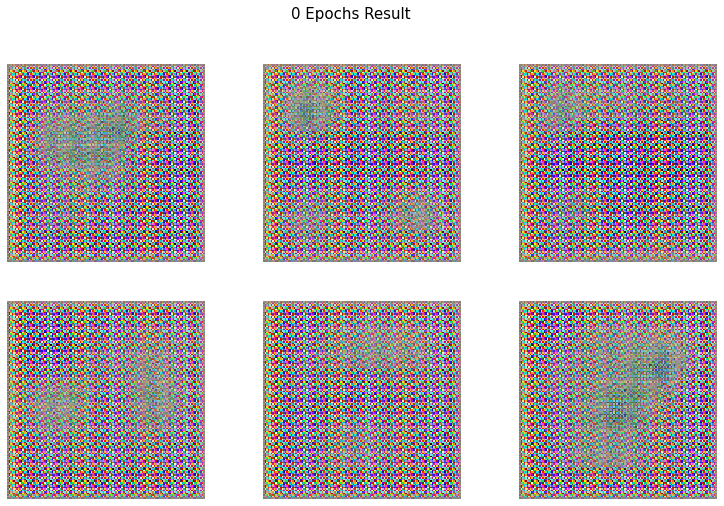

epochs:  20
epochs:  40
epochs:  60
epochs:  80
epochs:  100
Time since start: 4498.0


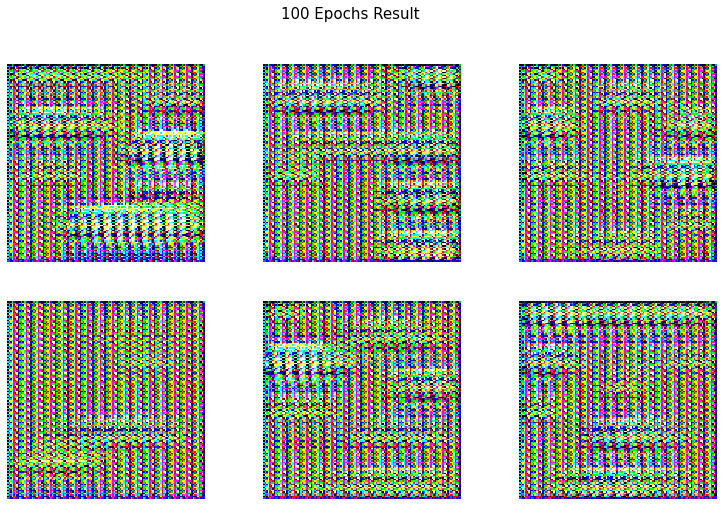

epochs:  120
epochs:  140
epochs:  160
epochs:  180
epochs:  200
Time since start: 8991.0


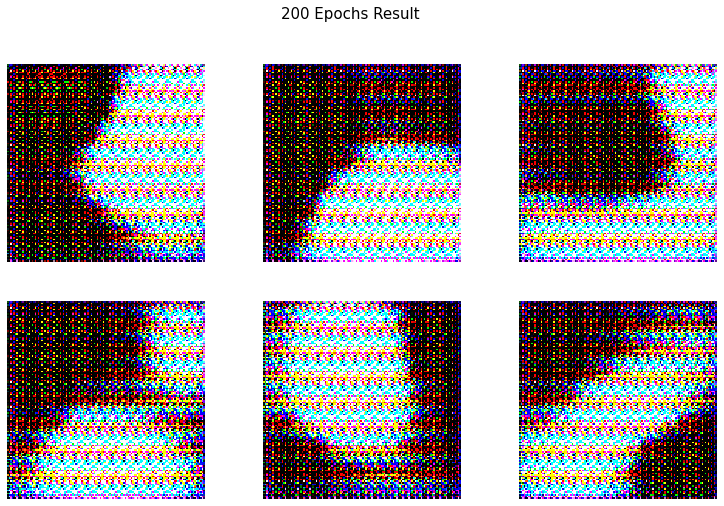

epochs:  220
epochs:  240
epochs:  260
epochs:  280
epochs:  300
Time since start: 13484.0


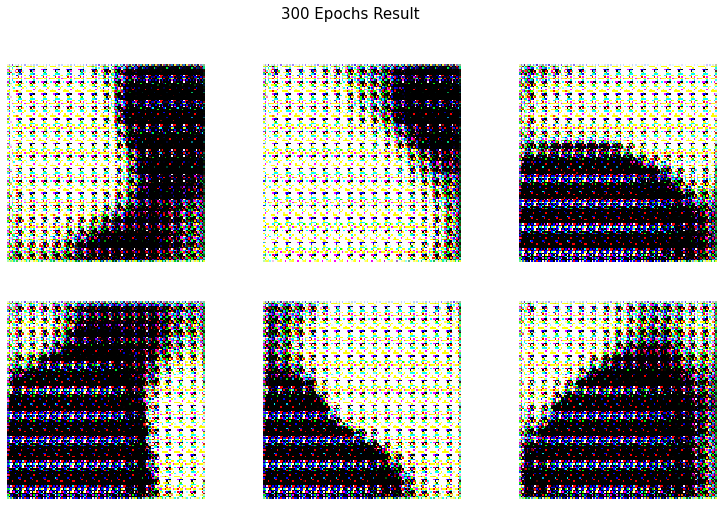

epochs:  320
epochs:  340
epochs:  360
epochs:  380
epochs:  399
Time since start: 17936.0
Training Complete.


In [ ]:
import time

epochs = 400
batch_size = 64
current_time = time.time()

with tf.device('/gpu:0'):
 for e in range(epochs):
    start_time = time.time()
    for _ in range(batch_size):
        # I reccomend you to look "Training Diagram" (at the top)
        noise = np.random.normal(0,1, [batch_size,100])

        generated_images = generator.predict(noise)

        image_batch = X_train[np.random.randint(low = 0, high = X_train.shape[0], size = batch_size)] #get samples from real data

        x = np.concatenate([image_batch, generated_images])

        y_dis = np.zeros(batch_size*2)
        y_dis[:batch_size] = 1 # we labeled real images as 1 and generated images as 0

        discriminator.trainable = True
        d_loss = discriminator.train_on_batch(x,y_dis) # we are training discriminator (train_on_batch)

        noise = np.random.normal(0,1,[batch_size,100])

        y_gen = np.ones(batch_size) # our generator says "these images are real"

        discriminator.trainable = False

        g_loss = GAN.train_on_batch(noise, y_gen) #train_on_batch

        D_loss.append(d_loss)
        G_loss.append(g_loss)

    if (e%20 == 0) or (e == epochs-1) :
        print("epochs: ",e)
    if e == epochs-1:
        print("Time since start: {}".format(np.round(start_time - current_time)))
        print("Training Complete.")

    # printing results
    if e%100 == 0:
        print("Time since start: {}".format(np.round(start_time - current_time)))

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)

        fig, axs = plt.subplots(2, 3, figsize=(13, 8), sharey=True)
        axs[0,0].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,0].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)
        axs[0,1].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,1].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128, 3)
        axs[0,2].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[0,2].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128, 128,3)
        axs[1,0].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,0].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128,3)
        axs[1,1].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,1].axis("off")

        noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
        generated_images = generator.predict(noise)
        generated_images = generated_images #.reshape(128,128,3)
        axs[1,2].imshow(generated_images[66].reshape(128,128,3), interpolation = "nearest")
        axs[1,2].axis("off")

        fig.suptitle("{} Epochs Result".format(str(e)),fontsize=15)
        plt.show()

In [ ]:
from keras import models
generator.save("generator_abstract_art.h5")
discriminator.save("discriminator_abstract_art.h5")

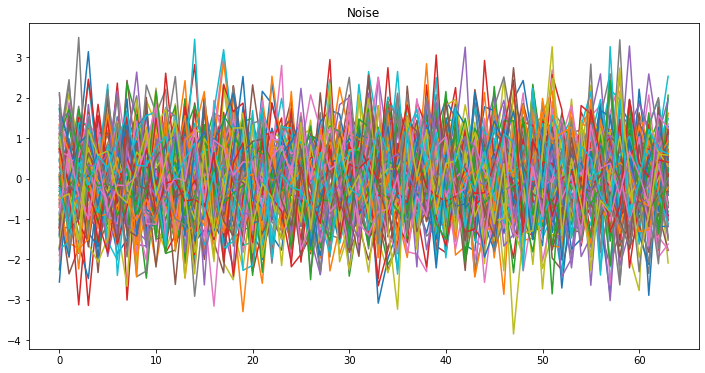

In [ ]:
fig = plt.figure(figsize = (12,6))
plt.plot(noise)
plt.title("Noise")
plt.show()

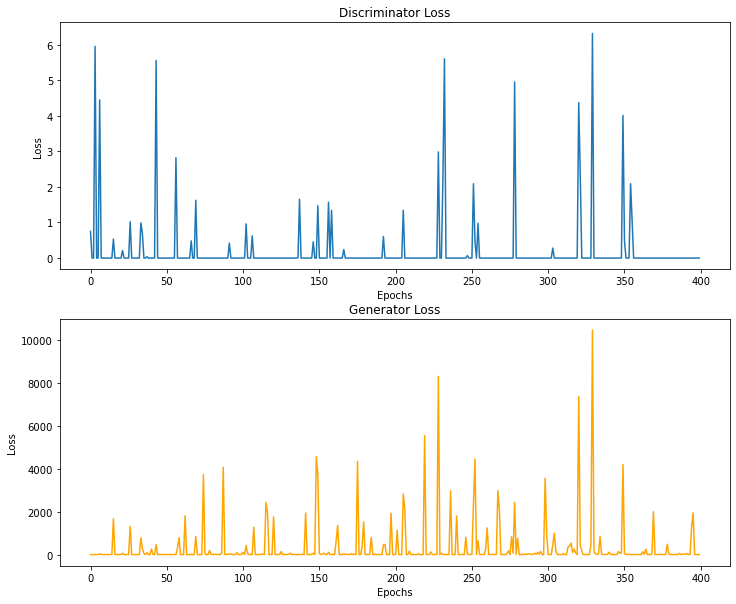

In [ ]:
index = 0
D_loss2 = []
G_loss2 = []

for i in range(1,epochs+1):
    D_loss2.append(D_loss[index])
    G_loss2.append(G_loss[index])
    index += batch_size

fig, axs = plt.subplots(2, 1, figsize = (12,10))

axs[0].plot(D_loss2, label = "Discriminator Loss")
axs[1].plot(G_loss2, label = "Generator Loss", color = "orange")

axs[0].set_xlabel("Epochs")
axs[1].set_xlabel("Epochs")

axs[0].set_ylabel("Loss")
axs[1].set_ylabel("Loss")

axs[0].set_title("Discriminator Loss")
axs[1].set_title("Generator Loss")
plt.show()

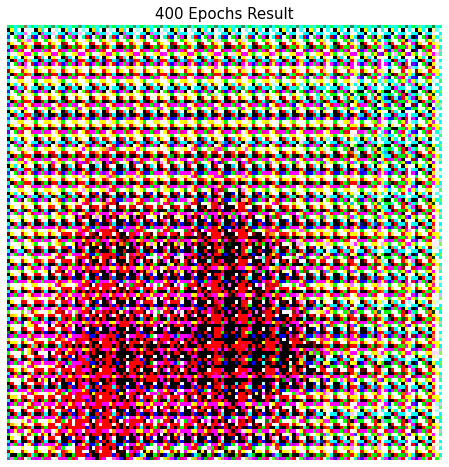

In [ ]:
fig = plt.figure(figsize = (12,8))
noise = np.random.normal(loc = 0, scale = 1, size=[100,100])
generated_images = generator.predict(noise)
generated_images = generated_images
plt.imshow(generated_images[66].reshape(128,128,3))
plt.axis("off")
plt.title("{} Epochs Result".format(str(e+1)),fontsize=15)
plt.show()